In [33]:
%matplotlib inline
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [34]:
인구 = pd.read_csv('인구.csv',encoding='CP949')
인구밀도 = pd.read_csv('인구밀도.csv',encoding='CP949')
GDP = pd.read_csv('GDP.csv',encoding='CP949')
출산율 = pd.read_csv('출산율.csv',encoding='CP949')
정부지출 = pd.read_csv('정부지출.csv',encoding='CP949')
사망률 = pd.read_csv('사망률.csv',encoding='CP949')
인구=인구.set_index('Country Name')
인구밀도=인구밀도.set_index('Country Name')#한 사람당 면적
GDP=GDP.set_index('Country Name')#millon
사망률=사망률.set_index('Country Name')#1000명당
정부지출=정부지출.set_index('Country Name')#millon
출산율=출산율.set_index('Country Name')#1000명당
인구=인구.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
인구밀도=인구밀도.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
GDP=GDP.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
사망률=사망률.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
정부지출=정부지출.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
출산율=출산율.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
출산율

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.1,7.8,NaN,5.9,NaN,NaN
"Korea, Rep.",42.277,41.013,39.579,38.065,36.552,35.119,33.82,32.65,31.595,30.652,...,9.4,9.6,8.6,8.6,8.6,7.9,7.0,6.4,NaN,NaN
Puerto Rico,32.400,31.400,31.300,31.000,31.000,30.700,28.90,26.70,25.500,24.900,...,11.1,10.6,10.1,9.7,9.0,8.3,7.3,6.7,NaN,NaN
San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,8.7,9.7,9.1,8.2,7.9,6.7,6.8,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.5,NaN,NaN,NaN,8.8,NaN,7.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sint Maarten (Dutch part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.9,12.0,14.0,14.1,NaN,NaN,9.0,NaN,NaN,NaN
Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
plt.rcParams["figure.figsize"] = (10,10)


In [11]:
(정부지출['2018']*1000000/인구['2018']).dropna().sort_values()


Country Name
World                     0.002244
IDA & IBRD total          0.002373
Low & middle income       0.002387
Middle income             0.002670
IBRD only                 0.003247
                          ...     
Faroe Islands           594.627771
Kiribati                637.706945
Greenland               787.715641
Marshall Islands        964.645747
Palau                  1850.792581
Name: 2018, Length: 211, dtype: float64

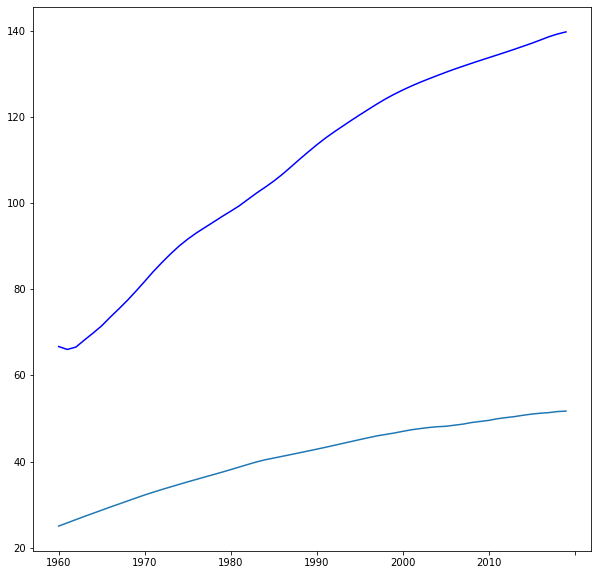

In [12]:
#출산율.loc['Korea, Rep.'].dropna().astype(float).plot()
#사망률.loc['Korea, Rep.'].dropna().astype(float).plot()
(인구.loc['Korea, Rep.']/1000000).dropna().astype(float).plot()
(인구.loc['China']/10000000).dropna().astype(float).plot(color='b')

In [17]:
인구=인구.loc[['Slovenia','Lithuania','Russian Federation','Romania','Argentina','Estonia','Latvia','Slovak Republic','Finland','Hungary','Mexico','Czech Republic','Bulgaria','Turkey','Germany','Austria','Brazil','Netherlands','Chile','Switzerland','Denmark','United Kingdom','Italy','South Africa','Sweden','Japan','Spain','Belgium','United States','Canada','Portugal','Israel','France','Poland','Colombia','Norway','China','New Zealand','Greece','India','Indonesia','Ireland','Australia','Korea, Rep.']]
GDP=GDP.loc[['Slovenia','Lithuania','Russian Federation','Romania','Argentina','Estonia','Latvia','Slovak Republic','Finland','Hungary','Mexico','Czech Republic','Bulgaria','Turkey','Germany','Austria','Brazil','Netherlands','Chile','Switzerland','Denmark','United Kingdom','Italy','South Africa','Sweden','Japan','Spain','Belgium','United States','Canada','Portugal','Israel','France','Poland','Colombia','Norway','China','New Zealand','Greece','India','Indonesia','Ireland','Australia','Korea, Rep.']]
인구['2018']

Country Name
Slovenia              2.073894e+06
Lithuania             2.801543e+06
Russian Federation    1.444779e+08
Romania               1.947254e+07
Argentina             4.449450e+07
Estonia               1.321977e+06
Latvia                1.927174e+06
Slovak Republic       5.446771e+06
Finland               5.515525e+06
Hungary               9.775564e+06
Mexico                1.261908e+08
Czech Republic        1.062993e+07
Bulgaria              7.025037e+06
Turkey                8.231972e+07
Germany               8.290578e+07
Austria               8.840521e+06
Brazil                2.094693e+08
Netherlands           1.723162e+07
Chile                 1.872916e+07
Switzerland           8.514329e+06
Denmark               5.793636e+06
United Kingdom        6.646034e+07
Italy                 6.042176e+07
South Africa          5.777962e+07
Sweden                1.017521e+07
Japan                 1.265291e+08
Spain                 4.679775e+07
Belgium               1.142705e+07
United 

In [31]:
data = pd.concat([np.log(인구['2017']),np.log(GDP['2018'])],axis=1)
data=data.loc[['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Colombia','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Romania','Russian Federation','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States']]
data

,2017,2018
Country Name,,
Argentina,17.600718,26.972521
Australia,17.018333,27.990708
Austria,15.989986,26.843772
Belgium,16.246942,27.021726
Brazil,19.152249,28.265204
Bulgaria,15.772212,24.916402
Canada,17.414009,28.171169
Chile,16.731682,26.421225
China,21.049973,30.262536


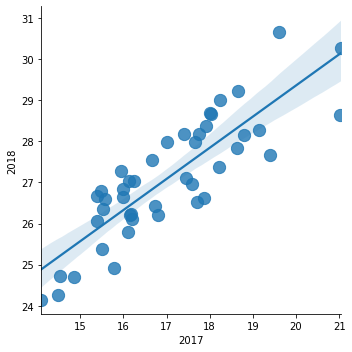

In [32]:
sns.lmplot('2017','2018',data=data,fit_reg=True,scatter_kws={"s":150})